In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv("breast-cancer-data.csv")

In [3]:
dat.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
X = dat.drop(["id", "diagnosis"], axis=1)

In [7]:
y = dat["diagnosis"]

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=10)

In [11]:
X_pca = pca.fit_transform(X)

In [15]:
X_pca.shape

(569, 10)

In [27]:
pca.explained_variance_ratio_*100

array([9.82044672e+01, 1.61764899e+00, 1.55751075e-01, 1.20931964e-02,
       8.82724536e-03, 6.64883951e-04, 4.01713682e-04, 8.22017197e-05,
       3.44135279e-05, 1.86018721e-05])

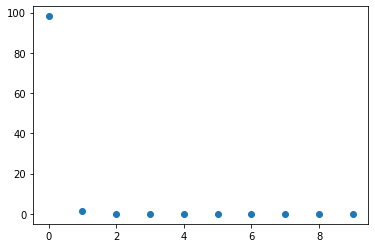

In [43]:
plt.plot(pca.explained_variance_ratio_*100, "o")

In [28]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 10) (171, 10) (398,) (171,)


In [49]:
from sklearn.linear_model import LogisticRegression

In [56]:
logRegModel = LogisticRegression(max_iter = 1000)

In [57]:
logRegModel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
predicted_y = logRegModel.predict(X_test)

In [62]:
logRegModel.score(X_test, y_test) * 100

92.98245614035088

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test, predicted_y)

array([[105,   7],
       [  5,  54]], dtype=int64)

## Accuracy score of 93% is achived 